In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\nehat\OneDrive\Desktop\CF DA Immersion\Achievement 4\Instacart Basket Analysis 09'

In [4]:
# Import Dataset

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_part1.pkl'))

In [5]:
df.head()

order_id  User_Id  order_number  orders_day_of_the_week  order_hour_of_day  \
0   2539329        1             1                       2                  8   
1   2398795        1             2                       3                  7   
2    473747        1             3                       3                 12   
3   2254736        1             4                       4                  7   
4    431534        1             5                       4                 15   

   days_since_prior_order  product_id  add_to_cart_order product_name  \
0                1.111484         196                  1         Soda   
1               15.000000         196                  1         Soda   
2               21.000000         196                  1         Soda   
3               29.000000         196                  1         Soda   
4               28.000000         196                  1         Soda   

   aisle_id  ...  frequency    frequency_flag  Gender    State Age  \
0        77  ...       20.0  Regular customer  Female  Alabama  31   
1        77  ...       20.0  Regular customer  Female  Alabama  31   
2        77  ...       20.0  Regular customer  Female  Alabama  31   
3        77  ...       20.0  Regular customer  Female  Alabama  31   
4        77  ...       20.0  Regular customer  Female  Alabama  31   

   Date_Joined Number_of_Dependants  Family_status Income  _merge  
0    2/17/2019                    3        married  40423    both  
1    2/17/2019                    3        married  40423    both  
2    2/17/2019                    3        married  40423    both  
3    2/17/2019                    3        married  40423    both  
4    2/17/2019                    3        married  40423    both  

[5 rows x 29 columns]

In [6]:
df.shape

(32434212, 29)

# Bar Chart

<AxesSubplot:>

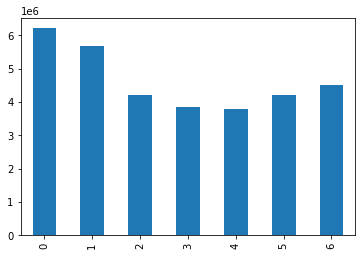

In [8]:
df['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

In [9]:
# Frequencies

df['orders_day_of_the_week'].value_counts(dropna = False).sort_index()

0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: orders_day_of_the_week, dtype: int64

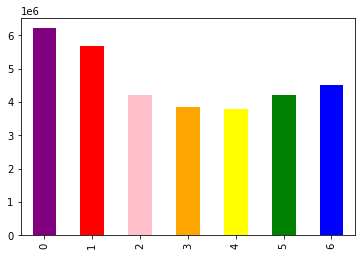

In [48]:
# Adding colour

bar = df['orders_day_of_the_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Histogram

<AxesSubplot:ylabel='Frequency'>

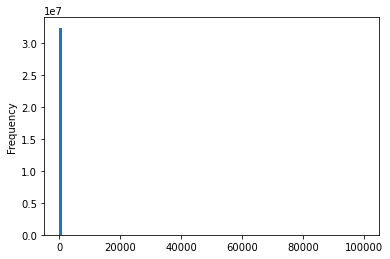

In [13]:
df['prices'].plot.hist(bins = 100)

In [14]:
df['prices'].max()

99999

In [15]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [17]:
df['prices'].max()

25.0

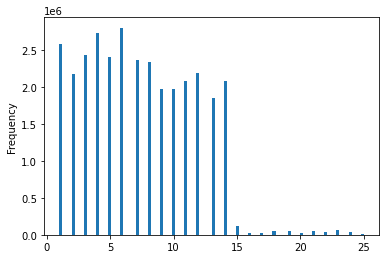

In [18]:
hist = df['prices'].plot.hist(bins = 100)

# Scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

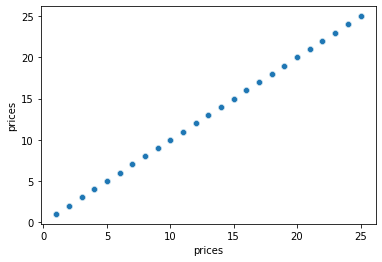

In [21]:
sns.scatterplot(x = 'prices', y = 'prices', data = df)

# Line Chart

In [25]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7

dev = np.random.rand(len(df)) <= 0.7

In [26]:
# Store 70% of the sample in the dataframe big

big = df[dev]

In [27]:
# Store 30% of the sample in the dataframe small

small = df[~dev]

In [28]:
len(df)

32434212

In [29]:
len(big) + len(small)

32434212

In [30]:
# Create small df to speed up processing

df_2 = small[['orders_day_of_the_week', 'prices']]

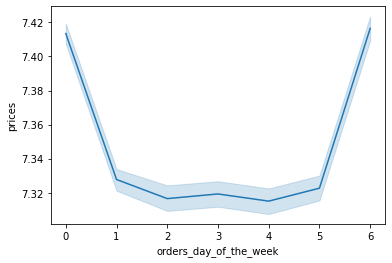

In [31]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices')

# 3.

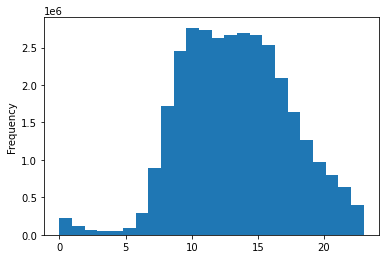

In [32]:
# Create histogram of the "order_hour_of_day"

hist_2 = df['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows that the most orders are placed during the day.

# 4.

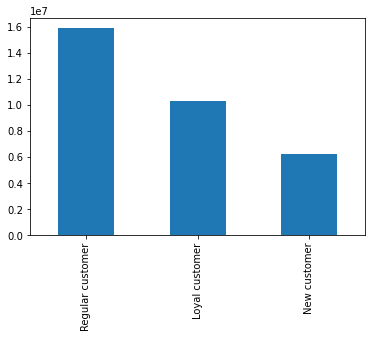

In [33]:
# Bar Chart for Loyalty_flag column

bar_2 = df['loyalty_flag'].value_counts().plot.bar()

# 5.

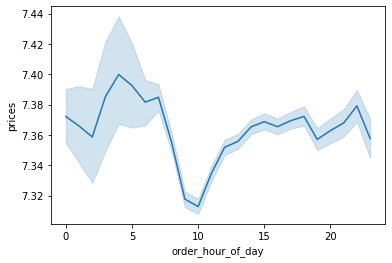

In [52]:
# Line Chart to look at the difference in expenditure and hour of the day.

line_2 = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

# 6.

In [39]:
# creating a smaller df

df_2 = df[['Age', 'Number_of_Dependants']]

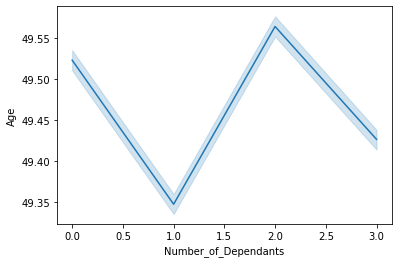

In [40]:
# Exploratory analysis of customer demographics. Age and Number of Dependants

line_3 = sns.lineplot(data = df_2, x = 'Number_of_Dependants', y = 'Age')

In [43]:
df['Age'].mean()

49.465207016591

This Line chart shows the average number of dependants for those of an avergae age of 49.47.

# 7.

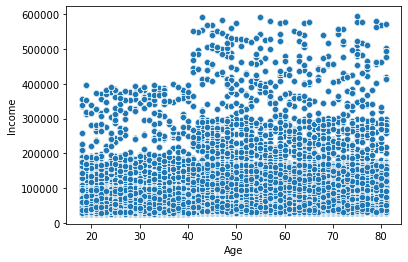

In [45]:
# Scatterplot to show a connection between age and spending power. Age and Income

scatterplot = sns.scatterplot(x = 'Age', y = 'Income', data = df)

The scatterplot shows the older the age  the higher the income and therefore potentially higher spending power. 

# 8. export all visualizations

In [49]:
# Export bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_day_of_the_week_bar.png'))

In [58]:
# Export histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_of_day_hist.png' ))

In [51]:
# Export loyalty flag bar chart

bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png' ))

In [53]:
# Export line chart age and dependants

line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependant_line.png' ))

In [56]:
# Export line chart for exploratory analysis of age and number of dependants

line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependants_line.png'))

In [57]:
# Export scatterplot for age and spending power

scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatter.png'))